 ## <center>Task 2: Exploratory Data Analysis

### Import the required libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

### Loading data

In [15]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [16]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [18]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


### Descriptive statistics of data

In [19]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [35]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [43]:
for col in client_df.columns:
    print("-------------------",col,"-------------------")
    print(client_df[col].value_counts())
    print("")

------------------- id -------------------
id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: count, Length: 14606, dtype: int64

------------------- channel_sales -------------------
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

------------------- cons_12m -------------------
cons_12m
0          11

In [20]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [37]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

### Statistics

In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

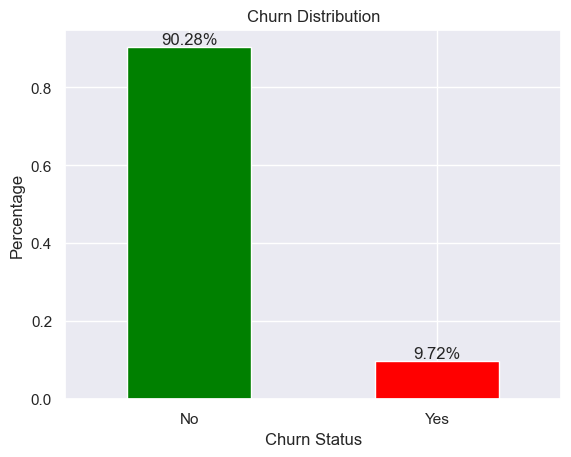

In [78]:
churn_counts = client_df['churn'].value_counts(normalize=True)

ax = churn_counts.plot(kind='bar', color=['green', 'red'])

plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')

# Add labels on top of each bar
for i, count in enumerate(churn_counts):
    plt.text(i, count, f'{count:.2%}', ha='center', va='bottom')

# Replace numerical labels with 'No' and 'Yes'
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

<b> Inference:</b> The majority of clients (90.28%) in the dataset have not churned ('No'), while a smaller percentage (9.72%) have churned ('Yes'). This suggests that the client base has a relatively low churn rate, indicating a strong retention of customers. Understanding the factors influencing the smaller churn group may provide insights into strategies to further improve customer retention.

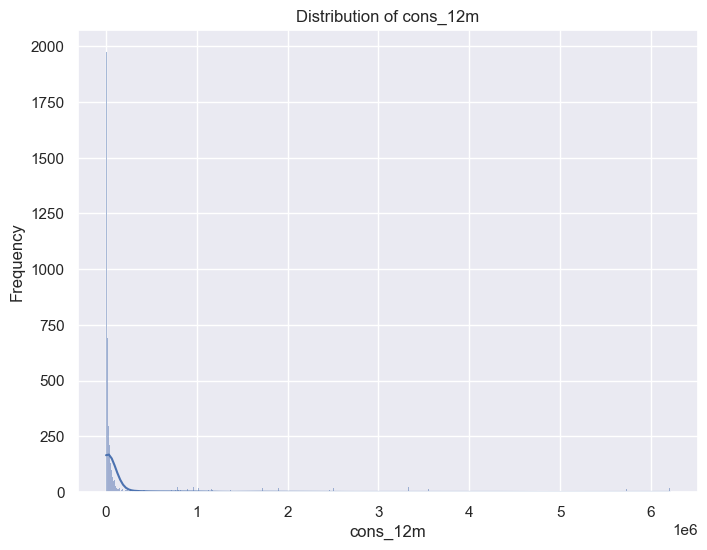

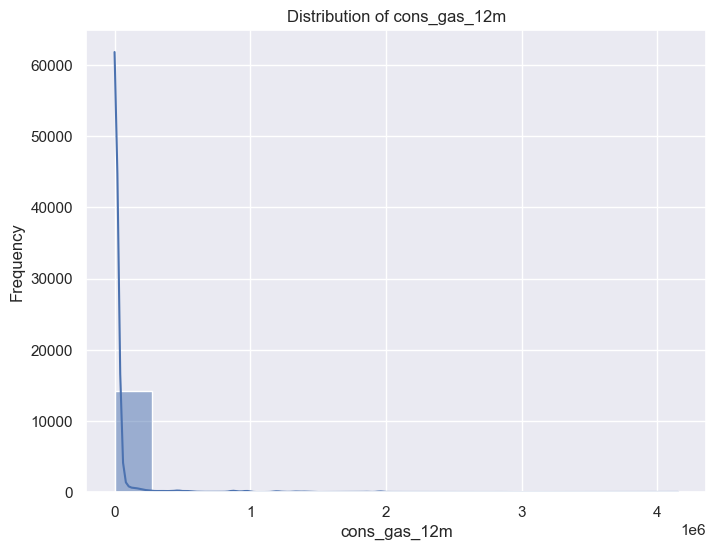

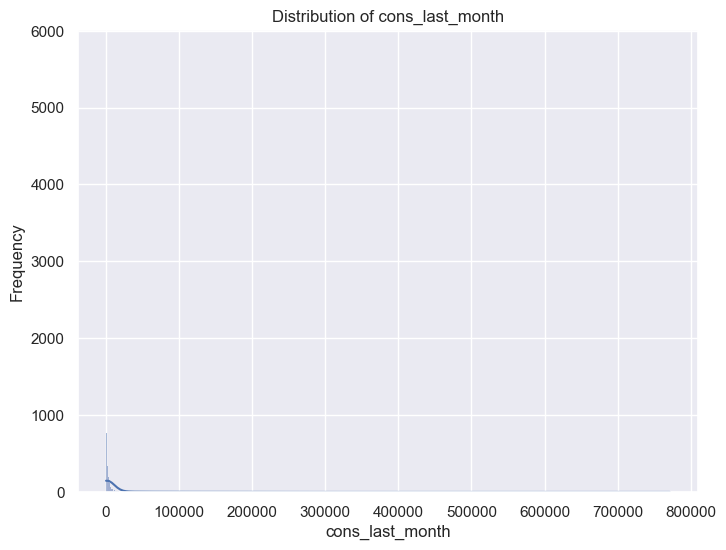

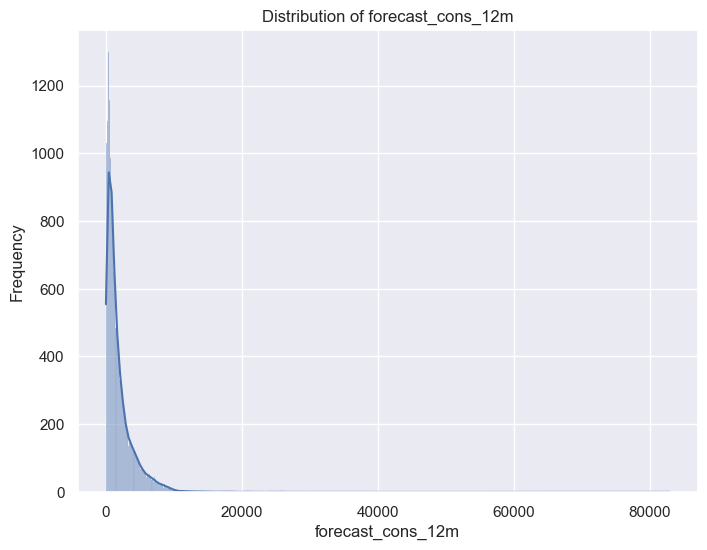

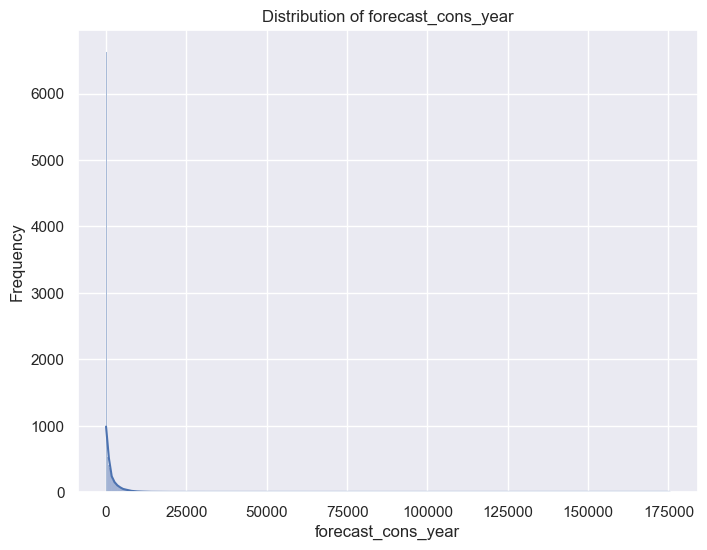

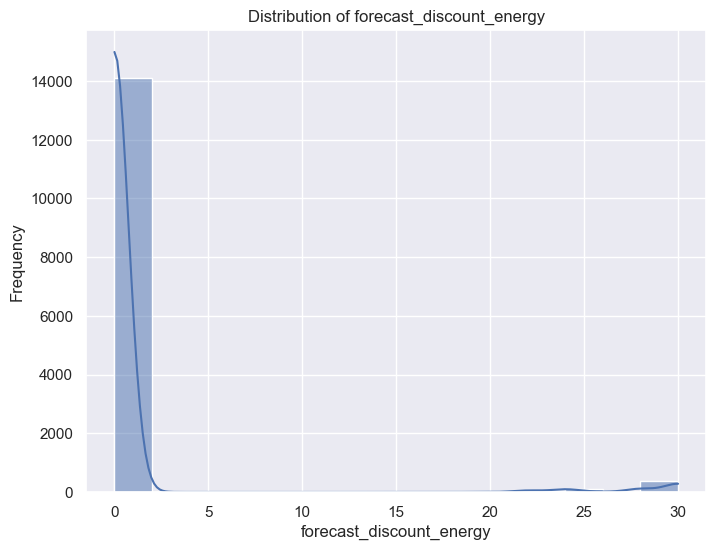

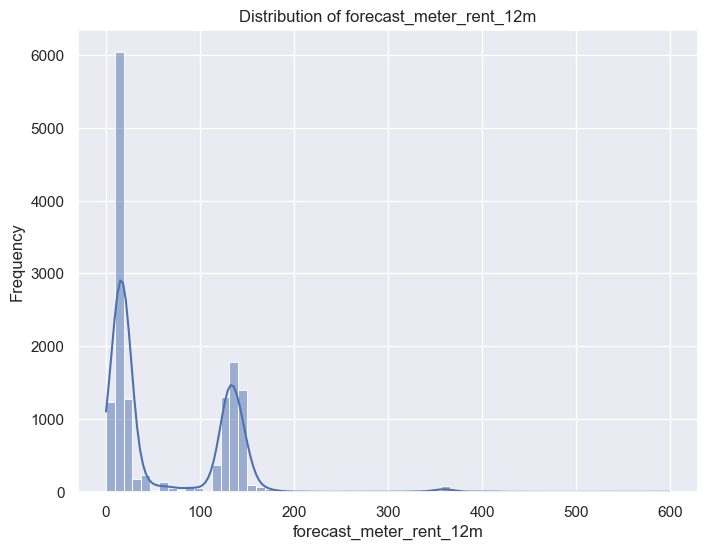

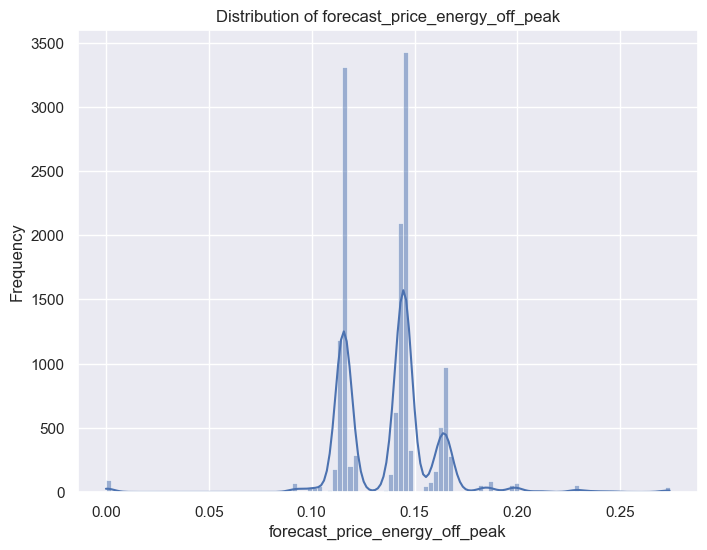

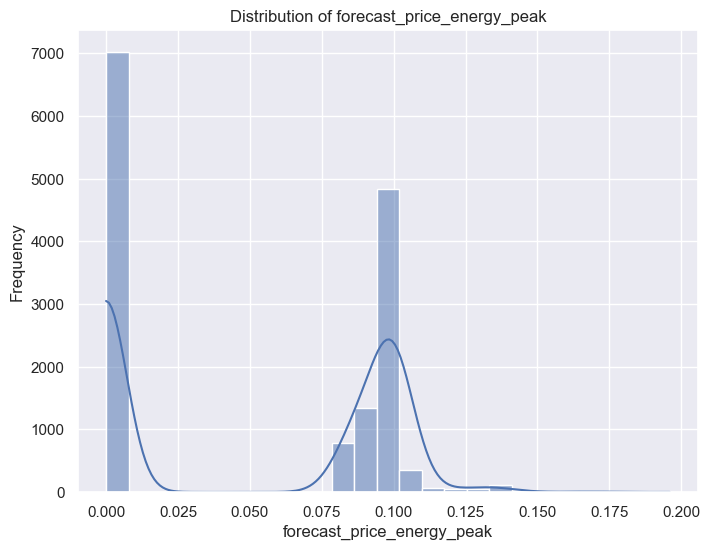

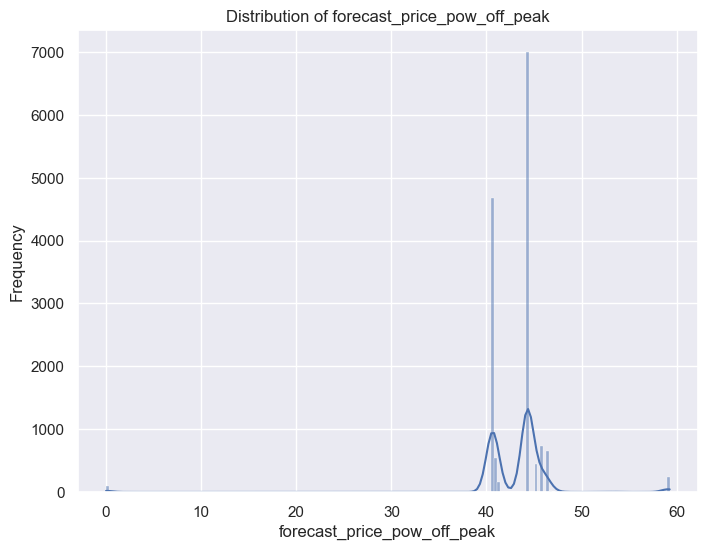

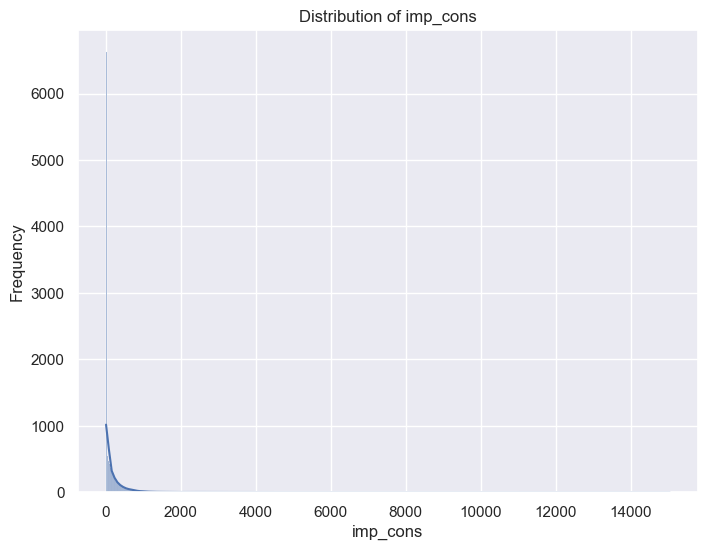

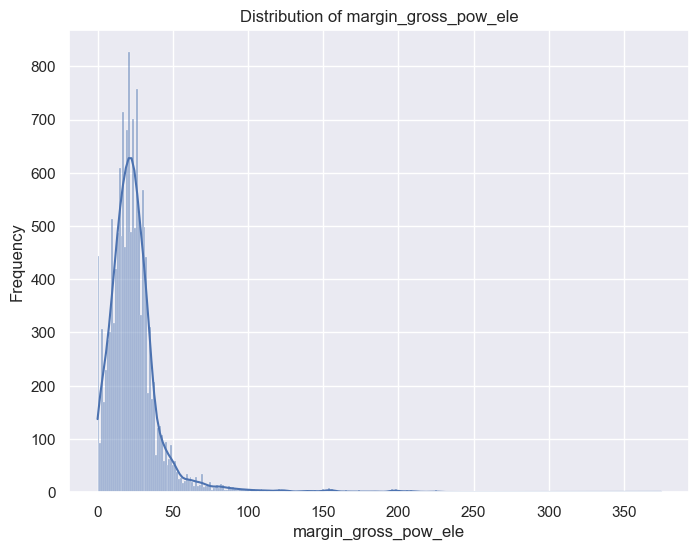

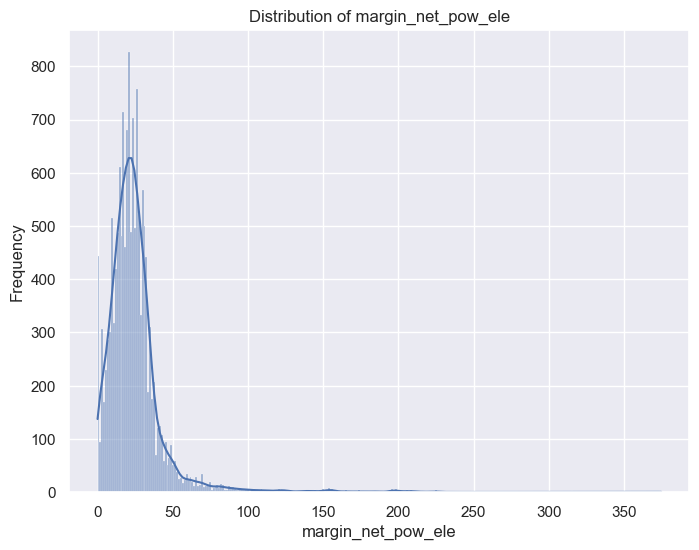

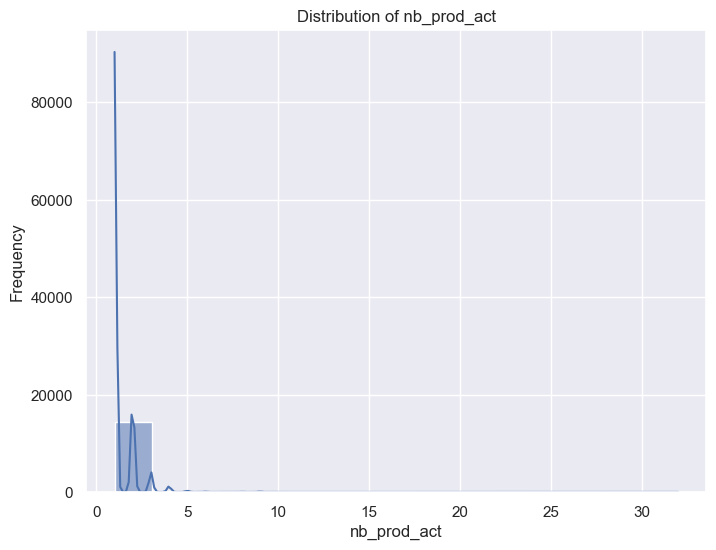

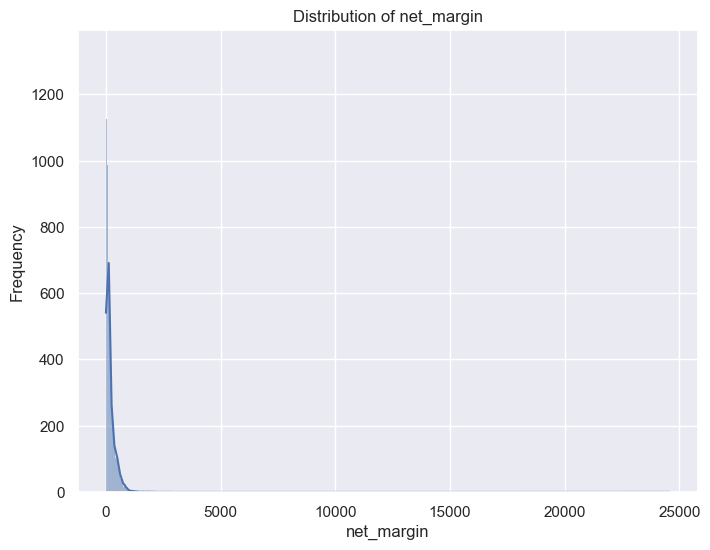

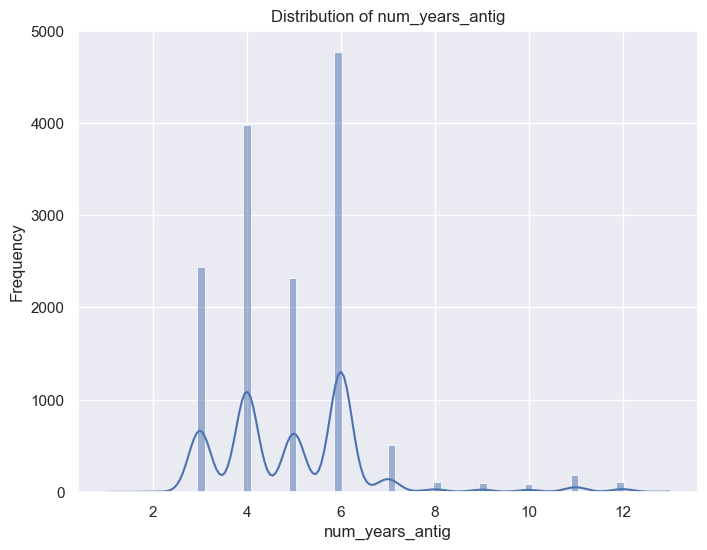

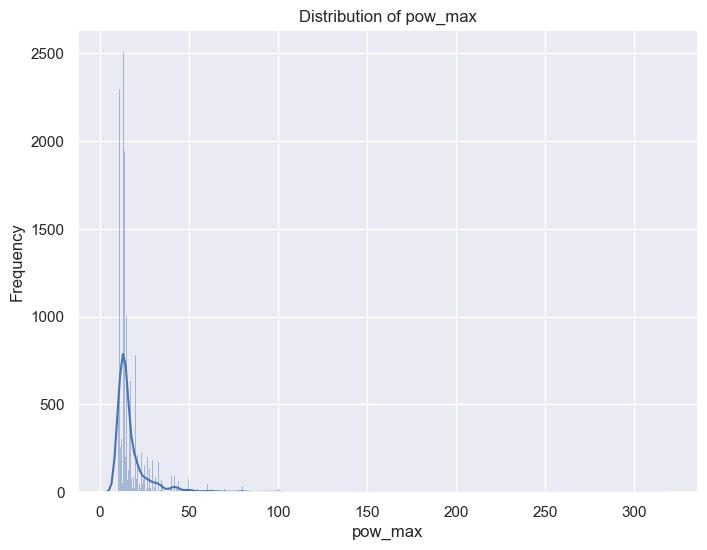

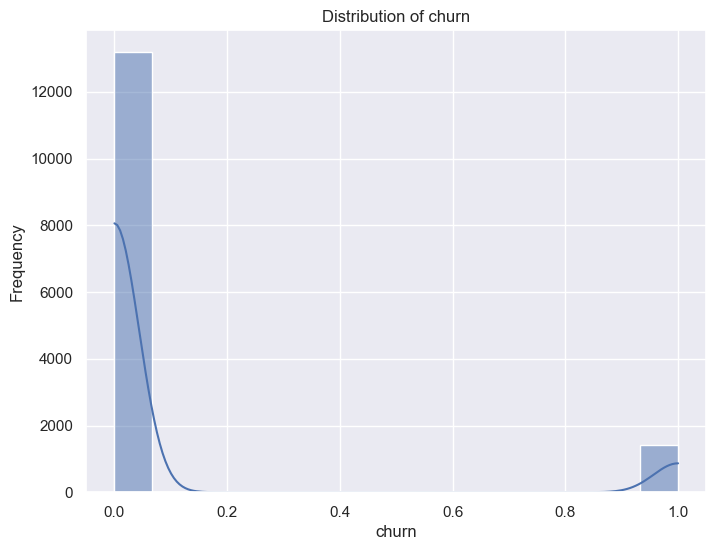

In [58]:
# Distributions of different columns using histograms
numerical_columns = client_df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(client_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Churn Rate by Channels

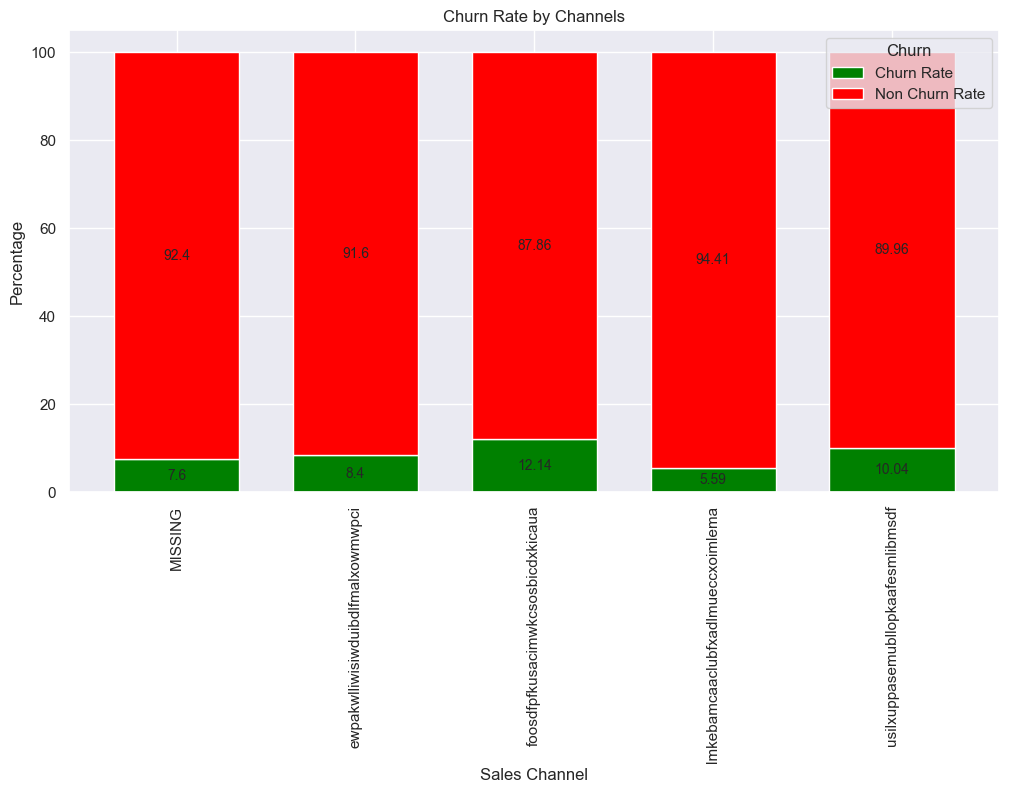

In [123]:
churn_rate = client_df.groupby(['channel_sales', 'churn']).size().unstack()

churn_rate = churn_rate.dropna()

# Calculate churn rate as percentage of the total for each channel
churn_rate['Churn Rate'] = round(churn_rate[1] / churn_rate.sum(axis=1) * 100,2)

churn_rate['Non Churn Rate'] = 100 - churn_rate['Churn Rate']

ax = churn_rate[['Churn Rate', 'Non Churn Rate']].plot(kind='bar', stacked=True, 
                                                       color=['green', 'red'], width=0.7, figsize=(12, 6))

# Add percentage labels on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(round(height,2), (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Churn Rate by Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.show()

<b> Inference:</b> Based on the churn rate by sales channels:

Two channels, 'foosdfpfkusacimwkcsosbicdxkicaua' with a churn rate of 12.14% and 'usilxuppasemubllopkaafesmlibmsdf' with a churn rate of 10.04%, exhibit relatively higher churn rates compared to the other two channels, 'ewpakwlliwisiwduibdlfmalxowmwpci' (8.40%) and 'lmkebamcaaclubfxadlmueccxoimlema' (5.59%). Additionally, the 'Unknown/Missing' channel shows a churn rate of 7.6%.

This suggests that customers from 'foosdfpfkusacimwkcsosbicdxkicaua' and 'usilxuppasemubllopkaafesmlibmsdf' may be more prone to churning, warranting a closer examination of these channels to identify factors contributing to higher churn. The 'Unknown/Missing' channel also shows a notable churn rate, emphasizing the need for further investigation to uncover information about this category and understand the underlying reasons for its churn rate.

In [124]:
churn_rate

churn,0,1,Churn Rate,Non Churn Rate
channel_sales,,,,
MISSING,3442.0,283.0,7.60,92.40
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0,8.40,91.60
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0,12.14,87.86
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0,5.59,94.41
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0,10.04,89.96


#### Churn Rate by  number of active products and services

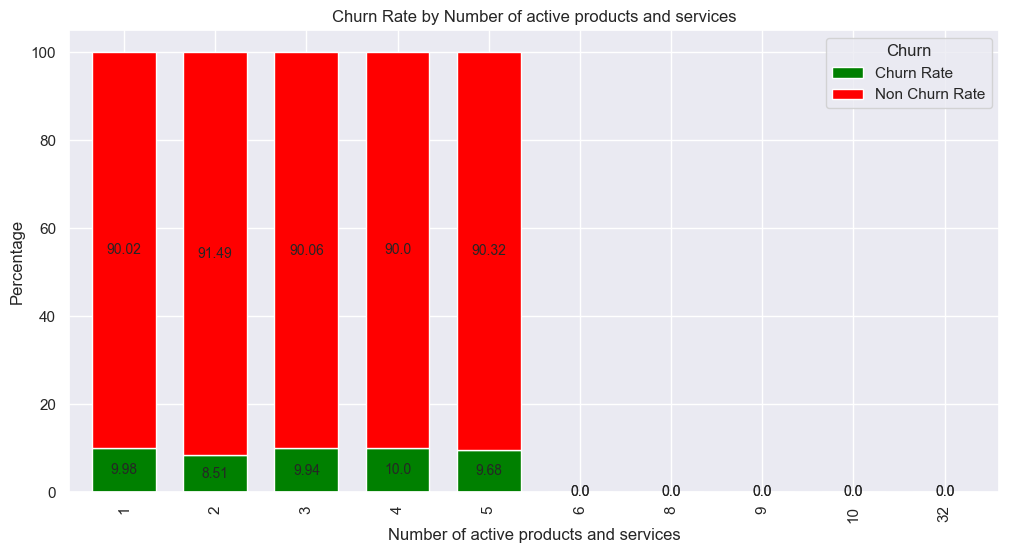

In [130]:
churn_rate = client_df.groupby(['nb_prod_act', 'churn']).size().unstack()

# Calculate churn rate as percentage of the total for each channel
churn_rate['Churn Rate'] = round(churn_rate[1] / churn_rate.sum(axis=1) * 100,2)

churn_rate['Non Churn Rate'] = 100 - churn_rate['Churn Rate']

ax = churn_rate[['Churn Rate', 'Non Churn Rate']].plot(kind='bar', stacked=True, color=['green', 'red'], 
                                                       width=0.7, figsize=(12, 6))

# Add percentage labels on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(round(height,2), (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Churn Rate by Number of active products and services')
plt.xlabel('Number of active products and services')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.show()

In [131]:
churn_rate

churn,0,1,Churn Rate,Non Churn Rate
nb_prod_act,,,,
1,10290.0,1141.0,9.98,90.02
2,2237.0,208.0,8.51,91.49
3,471.0,52.0,9.94,90.06
4,135.0,15.0,10.00,90.00
5,28.0,3.0,9.68,90.32
6,8.0,NaN,NaN,NaN
8,4.0,NaN,NaN,NaN
9,11.0,NaN,NaN,NaN
10,2.0,NaN,NaN,NaN


#### Churn Rate by antiquity of the client (in number of years)

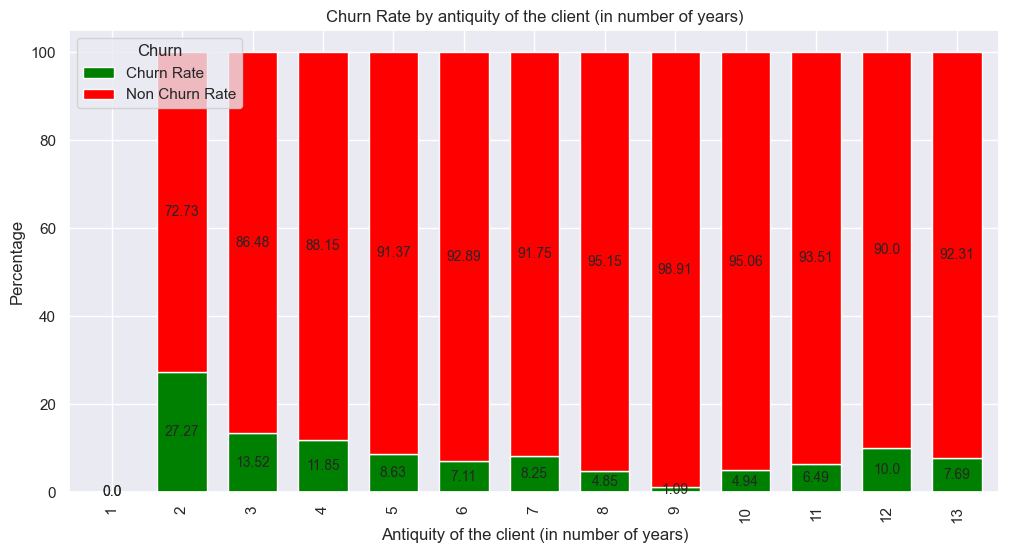

In [132]:
churn_rate = client_df.groupby(['num_years_antig', 'churn']).size().unstack()

# Calculate churn rate as percentage of the total for each channel
churn_rate['Churn Rate'] = round(churn_rate[1] / churn_rate.sum(axis=1) * 100,2)

churn_rate['Non Churn Rate'] = 100 - churn_rate['Churn Rate']

ax = churn_rate[['Churn Rate', 'Non Churn Rate']].plot(kind='bar', stacked=True, color=['green', 'red'], 
                                                       width=0.7, figsize=(12, 6))

# Add percentage labels on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(round(height,2), (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.title('Churn Rate by antiquity of the client (in number of years)')
plt.xlabel('Antiquity of the client (in number of years)')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.show()

In [133]:
churn_rate

churn,0,1,Churn Rate,Non Churn Rate
num_years_antig,,,,
1,1.0,NaN,NaN,NaN
2,8.0,3.0,27.27,72.73
3,2104.0,329.0,13.52,86.48
4,3510.0,472.0,11.85,88.15
5,2117.0,200.0,8.63,91.37
6,4430.0,339.0,7.11,92.89
7,467.0,42.0,8.25,91.75
8,98.0,5.0,4.85,95.15
9,91.0,1.0,1.09,98.91
